In [178]:
# Libraries.
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Setup.
% matplotlib inline

# Paths.
path_data = '../../../data/gatecount_%d/'

In [3]:
gate_1315=pd.read_csv('../../../data/gatecounts_edit_1315.csv')
gate_1315.head()

,Unnamed: 0,locationid,entries,servicedate,servicetime_fraction,weekday,month
0,0,1002,0,2013-01-01 00:00:00,3.00,1,1
1,1,1002,1,2013-01-01 00:00:00,5.00,1,1
2,2,1002,2,2013-01-01 00:00:00,5.25,1,1
3,3,1002,3,2013-01-01 00:00:00,5.50,1,1
4,4,1002,6,2013-01-01 00:00:00,5.75,1,1


In [231]:
mbta_daily=pd.read_csv('../../../data/mbta_daily.csv')
mbta_daily.head()

In [228]:
#mbta_daily['month']=map(month_col,mbta_daily['service_day'].values)

mbta_daily=mbta_daily[['locationid','service_day','snow','snow_fall']]
mbta_daily.head()

###Comment:

Create a narrow data set containing only snow info for each day

In [184]:
snow_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
snow_daily=snow_daily[['service_day','snow','snow_fall']]
print snow_daily.head()

           service_day  snow  snow_fall
0  2013-01-01 00:00:00     0          0
1  2013-01-02 00:00:00     0          0
2  2013-01-03 00:00:00     0          0
3  2013-01-04 00:00:00     0          0
4  2013-01-05 00:00:00     0          0


###Comment:

Create a narrow data set containing only rain info for each day

In [261]:
rain_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
rain_daily=rain_daily[['service_day','rain','rain_fall']]
print rain_daily.head()

           service_day  rain  rain_fall
0  2013-01-01 00:00:00     0          0
1  2013-01-02 00:00:00     0          0
2  2013-01-03 00:00:00     0          0
3  2013-01-04 00:00:00     0          0
4  2013-01-05 00:00:00     0          0


In [264]:
rain_daily['drizzle']=(rain_daily['rain']==1)&(rain_daily['rain_fall']<=0.1)
rain_daily['rain_not_drizzle']=rain_daily['rain_fall']>0.1

print rain_daily.head()

           service_day  rain  rain_fall drizzle rain_not_drizzle
0  2013-01-01 00:00:00     0          0   False            False
1  2013-01-02 00:00:00     0          0   False            False
2  2013-01-03 00:00:00     0          0   False            False
3  2013-01-04 00:00:00     0          0   False            False
4  2013-01-05 00:00:00     0          0   False            False


In [292]:
def split_date(t):
    return t.split(' ')[0]


rain_daily['service_day']=map(split_date,rain_daily['service_day'].values)
rain_daily['service_day']=pd.to_datetime(rain_daily['service_day'], format="%Y-%m-%d")

###Comment:

Create a narrow data set containing only temperature info for each day

In [326]:

temp_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
temp_daily=temp_daily[['service_day','temp_mean']]

temp_daily['service_day']=map(split_date,temp_daily['service_day'].values)
temp_daily['service_day']=pd.to_datetime(temp_daily['service_day'], format="%Y-%m-%d")
print temp_daily.head()

  service_day  temp_mean
0  2013-01-01         29
1  2013-01-02         21
2  2013-01-03         16
3  2013-01-04         30
4  2013-01-05         35


In [327]:
temp_daily['freezing']=temp_daily['temp_mean']<=32
temp_daily['32_50']=(temp_daily['temp_mean']>32)&(temp_daily['temp_mean']<=50)
temp_daily['50_85']=(temp_daily['temp_mean']>50)&(temp_daily['temp_mean']<=85)
temp_daily['hot']=temp_daily['temp_mean']>85

print temp_daily.head()

  service_day  temp_mean freezing  32_50  50_85    hot
0  2013-01-01         29     True  False  False  False
1  2013-01-02         21     True  False  False  False
2  2013-01-03         16     True  False  False  False
3  2013-01-04         30     True  False  False  False
4  2013-01-05         35    False   True  False  False


##Determining snow bins

It's difficult to create equal-length bins, especially when approximately 75% of snowfall is 0-2 inches. The rest of the bins are as close to equally sized as possible.

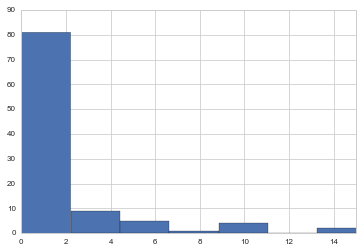

Snow days  104
Trace snow:  37
0-2 in snow:  44
2-4 in snow:  9
4-8 in snow:  6
8-15 in snow:  6
+15 in snow:  2


In [74]:
days_with_snow=snow_daily[snow_daily['snow']==1]


plt.hist(days_with_snow['snow_fall'].values,bins=10)
plt.xlim([0,15])
plt.show()


print 'Snow days ',len(days_with_snow)
print 'Trace snow: ',len(days_with_snow[days_with_snow['snow_fall']==0])
print '0-2 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>0)&(days_with_snow['snow_fall']<=2)])
print '2-4 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>2)&(days_with_snow['snow_fall']<=4)])
print '4-8 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>4)&(days_with_snow['snow_fall']<=8)])
print '8-15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>8)&(days_with_snow['snow_fall']<=15)])
print '+15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>15)])



In [351]:
station_info=pd.read_csv('../../../data/Stations_clean.csv')
station_latlong=pd.read_csv('../../../data/stations_latlong.csv')
station_latlong=station_latlong[['stationid','lat','lon','line_1','line_2']]

print station_latlong.head()

   stationid        lat        lon line_1 line_2
0       1002  42.329550 -71.056960    Red    NaN
1       1004  42.321438 -71.052393    Red    NaN
2       1005  42.274816 -71.029176    Red    NaN
3       1006  42.265615 -71.019402    Red    NaN
4       1007  42.250879 -71.004798    Red    NaN


In [9]:
station_info[['stationid','name','line_temp']].to_csv('stations_dave.csv')

In [352]:
station_info=station_info.merge(station_latlong,on='stationid')
print station_info.head()

   Unnamed: 0  stationid           name line_temp  grouping  dist_to_center  \
0           0       1002  Andrew Square       Red         2        3.404767   
1           1       1004     JFK/U Mass       Red         0        4.328881   
2           2       1005   North Quincy       Red         1        9.777437   
3           3       1006      Wollaston       Red         1       10.976943   
4           4       1007  Quincy Center       Red         1       12.909591   

         lat        lon line_1 line_2  
0  42.329550 -71.056960    Red    NaN  
1  42.321438 -71.052393    Red    NaN  
2  42.274816 -71.029176    Red    NaN  
3  42.265615 -71.019402    Red    NaN  
4  42.250879 -71.004798    Red    NaN  


In [374]:
'''
station_id: station id of interest
bins: a list of tuples except for the first and last elements which are singletons. Used for identifying snowfall levels
    For example, bins=[ (0), (0,2), (2,4)..., (15)  ]
    
'''

def subset(station_id,bins,begin_time=5.25,end_time=24):
    
    res={}
    res['weekday']={}
    res['weekday']['snow']={}
    res['weekday']['rain']={}
    res['weekday']['temp']={}
    
    res['weekend']={}
    res['weekend']['snow']={}
    res['weekend']['rain']={}
    res['weekend']['temp']={}
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    
    res['station_id']=1.*station_id
    res['station_name']= station_info[station_info['stationid']==station_id]['name'].values[0]
    res['coords']= [station_info[station_info['stationid']==station_id]['lat'].values[0],station_info[station_info['stationid']==station_id]['lon'].values[0]]
    
    res['line']=list([])
    
    res['line'].append(station_info[station_info['stationid']==station_id]['line_1'].values[0])
    
    if(isinstance(station_info[station_info['stationid']==station_id]['line_2'].values[0], basestring) ):
        res['line'].append(station_info[station_info['stationid']==station_id]['line_2'].values[0])
    
    
    res['time_intervals']=list(no_snow_mean.index.values)

    #print len(res['time_intervals'])
    res['weekday']['snow']['mean_ent']=list(no_snow_mean['entries'].values)
    res['weekday']['snow']['aggr_ent']=np.sum(list(no_snow_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekday']['snow']['mean_ent_snow']={}
    res['weekday']['snow']['aggr_ent_snow']={}
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['snow']['mean_ent_snow'][str(bins[0])]=list(1.*snow_subset['entries'].values)
    res['weekday']['snow']['aggr_ent_snow'][str(bins[0])]=np.sum(list((1.*snow_subset['entries']).values))
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
        #print len(snow_subset)
        res['weekday']['snow']['mean_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=list(1.*snow_subset['entries'].values)
        res['weekday']['snow']['aggr_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=np.sum(list(1.*snow_subset['entries'].values))

        
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['snow']['mean_ent_snow'][str(bins[(-1)])]=list(1.*snow_subset['entries'].values)
    res['weekday']['snow']['aggr_ent_snow'][str(bins[(-1)])]=np.sum(list(1.*snow_subset['entries'].values))
    
    
    #########################
    ## Repeat for weekend####
    #########################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekend']['snow']['mean_ent']=list(no_snow_mean['entries'].values)
    res['weekend']['snow']['aggr_ent']=np.sum(list(no_snow_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekend']['snow']['mean_ent_snow']={}
    res['weekend']['snow']['aggr_ent_snow']={}
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['snow']['mean_ent_snow'][str(bins[0])]=list(1.*snow_subset['entries'].values)
    res['weekend']['snow']['aggr_ent_snow'][str(bins[0])]=np.sum(list((1.*snow_subset['entries']).values))
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
        #print len(snow_subset)
        res['weekend']['snow']['mean_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=list(1.*snow_subset['entries'].values)
        res['weekend']['snow']['aggr_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=np.sum(list(1.*snow_subset['entries'].values))

        
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['snow']['mean_ent_snow'][str(bins[(-1)])]=list(1.*snow_subset['entries'].values)
    res['weekend']['snow']['aggr_ent_snow'][str(bins[(-1)])]=np.sum(list(1.*snow_subset['entries'].values))

    ################
    ## Rain records#
    ################
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    no_rain_mean=no_rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekday']['rain']['mean_ent']=list(no_rain_mean['entries'].values)
    res['weekday']['rain']['aggr_ent']=np.sum(list(no_rain_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekday']['rain']['mean_ent_rain']={}
    res['weekday']['rain']['aggr_ent_rain']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    drizzle_subset=drizzle[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['rain']['mean_ent_rain']['drizzle']=list(1.*drizzle_subset['entries'].values)
    res['weekday']['rain']['aggr_ent_rain']['drizzle']=np.sum(list((1.*drizzle_subset['entries']).values))
        
    # create time series for the last, singleton element in bins
    #rain_subset=rain[rain['rain_fall']>=bins[-1]]
    rain_subset=rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['rain']['mean_ent_rain']['rain_no_drizzle']=list(1.*rain_subset['entries'].values)
    res['weekday']['rain']['aggr_ent_rain']['rain_no_drizzle']=np.sum(list(1.*rain_subset['entries'].values))
    
    #################### Now add rain for weekends
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(rain_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of rain records
    no_rain=station_records[station_records['rain']==False]
    drizzle=station_records[station_records['drizzle']==True]
    rain=station_records[station_records['rain_not_drizzle']==True]  
    
    no_rain_mean=no_rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekend']['rain']['mean_ent']=list(no_rain_mean['entries'].values)
    res['weekend']['rain']['aggr_ent']=np.sum(list(no_rain_mean['entries'].values))

    
    # create time series for various snow bins
    res['weekend']['rain']['mean_ent_rain']={}
    res['weekend']['rain']['aggr_ent_rain']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    drizzle_subset=drizzle[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['rain']['mean_ent_rain']['drizzle']=list(1.*drizzle_subset['entries'].values)
    res['weekend']['rain']['aggr_ent_rain']['drizzle']=np.sum(list((1.*drizzle_subset['entries']).values))
        
    # create time series for the last, singleton element in bins
    #rain_subset=rain[rain['rain_fall']>=bins[-1]]
    rain_subset=rain[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['rain']['mean_ent_rain']['rain_no_drizzle']=list(1.*rain_subset['entries'].values)
    res['weekend']['rain']['aggr_ent_rain']['rain_no_drizzle']=np.sum(list(1.*rain_subset['entries'].values))
    
    #####################
    #### Temperature ####
    #####################
    
     #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(temp_daily,left_on='servicedate',right_on='service_day')
    #return station_records
    
    #get subset of rain records
    freezing=station_records[station_records['freezing']==True]
    _3250=station_records[station_records['32_50']==True]
    _5085=station_records[station_records['50_85']==True]
    hot=station_records[station_records['hot']==True]
    
    reference=station_records[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekday']['temp']['mean_ent']=list(reference['entries'].values)
    res['weekday']['temp']['aggr_ent']=np.sum(list(reference['entries'].values))

    
    # create time series for various snow bins
    res['weekday']['temp']['mean_ent_temp']={}
    res['weekday']['temp']['aggr_ent_temp']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    freezing_subset=freezing[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['temp']['mean_ent_temp']['freezing']=list(1.*freezing_subset['entries'].values)
    res['weekday']['temp']['aggr_ent_temp']['freezing']=np.sum(list((1.*freezing_subset['entries']).values))
        

    _3250_subset=_3250[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['temp']['mean_ent_temp']['32_50']=list(1.*_3250_subset['entries'].values)
    res['weekday']['temp']['aggr_ent_temp']['32_50']=np.sum(list(1.*_3250_subset['entries'].values))
    
    _5085_subset=_5085[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['temp']['mean_ent_temp']['50_85']=list(1.*_5085_subset['entries'].values)
    res['weekday']['temp']['aggr_ent_temp']['50_85']=np.sum(list(1.*_5085_subset['entries'].values))
    
    hot_subset=freezing[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekday']['temp']['mean_ent_temp']['hot']=list(1.*hot_subset['entries'].values)
    res['weekday']['temp']['aggr_ent_temp']['hot']=np.sum(list((1.*hot_subset['entries']).values))
    
    ###### Add temp for weekends
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    station_records=station_records[station_records['weekday']>=5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]

    # Now merge in the weather data
    station_records=station_records.merge(temp_daily,left_on='servicedate',right_on='service_day')
    #return station_records
    
    #get subset of rain records
    freezing=station_records[station_records['freezing']==True]
    _3250=station_records[station_records['32_50']==True]
    _5085=station_records[station_records['50_85']==True]
    hot=station_records[station_records['hot']==True]
    
    reference=station_records[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)

    #print len(res['time_intervals'])
    res['weekend']['temp']['mean_ent']=list(reference['entries'].values)
    res['weekend']['temp']['aggr_ent']=np.sum(list(reference['entries'].values))

    
    # create time series for various snow bins
    res['weekend']['temp']['mean_ent_temp']={}
    res['weekend']['temp']['aggr_ent_temp']={}
    
    # create time series for the first, singleton element in bins
    #rain_subset=rain[rain['rain_fall']==bins[0]]
    freezing_subset=freezing[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['temp']['mean_ent_temp']['freezing']=list(1.*freezing_subset['entries'].values)
    res['weekend']['temp']['aggr_ent_temp']['freezing']=np.sum(list((1.*freezing_subset['entries']).values))
        

    _3250_subset=_3250[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['temp']['mean_ent_temp']['32_50']=list(1.*_3250_subset['entries'].values)
    res['weekend']['temp']['aggr_ent_temp']['32_50']=np.sum(list(1.*_3250_subset['entries'].values))
    
    _5085_subset=_5085[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['temp']['mean_ent_temp']['50_85']=list(1.*_5085_subset['entries'].values)
    res['weekend']['temp']['aggr_ent_temp']['50_85']=np.sum(list(1.*_5085_subset['entries'].values))
    
    hot_subset=freezing[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['weekend']['temp']['mean_ent_temp']['hot']=list(1.*hot_subset['entries'].values)
    res['weekend']['temp']['aggr_ent_temp']['hot']=np.sum(list((1.*hot_subset['entries']).values))
    
    return res
    


In [377]:
t=subset(1009,bins=[ (0), (0,2),(2,4),(4,8),(8,15),(15)] ,begin_time=5.25,end_time=24)

print t.keys()

['time_intervals', 'station_id', 'coords', 'weekday', 'line', 'weekend', 'station_name']


In [309]:
import json

### Preparing master list containing series for each station

Note: station_id is stored as a float due to serializable issues in json.dump

In [379]:

master_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(2,4),(4,8),(8,15),(15)]

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    master_list.append(subset(station,bins= bins_ ,begin_time=5.25,end_time=24))
    
print len(master_list)
    

61


In [380]:
# write actual json file
filename='station_series.json'

with open(filename, 'w') as outfile:
    json.dump(master_list, outfile)

In [321]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
print data[0]['weekday']['rain']['aggr_ent']

5983.36984117


## Write shorter, summary json file 

This json file will be the same as the above one except the series 'mean_ent_snow','mean_ent', and 'time_intervals' will be removed. Wanted to have both available just in case

In [406]:

summary_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(2,4),(4,8),(8,15),(15)]
remove=['mean_ent_snow','mean_ent','time_intervals']

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    t=subset(station,bins= bins_ ,begin_time=5.25,end_time=24)
    
    for key in remove:
        t.pop(key,None)
        
    summary_list.append(t)
    
print len(summary_list)
    

61


In [407]:
# write actual json file
filename='station_summary.json'

with open(filename, 'w') as outfile:
    json.dump(summary_list, outfile)

In [408]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
data[0]

{u'aggr_ent': 6010.281460552052,
 u'aggr_ent_snow': {u'0': 6025.081196581196,
  u'0_2': 5606.535349388798,
  u'15': 3153.0,
  u'2_4': 5475.4285714285725,
  u'4_8': 4524.666666666666,
  u'8_15': 3771.4833333333336},
 u'coords': [42.32955, -71.05696],
 u'station_id': 1002.0,
 u'station_name': u'Andrew Square'}

##Aggregate Across Stations

Generate plot and play with way we'd want to display days of snow.

In [19]:
from sets import Set

In [137]:
def split_date(t):
    return t.split(' ')[0]


gate_1315['servicedate']=map(split_date,gate_1315['servicedate'].values)
gate_1315['servicedate']=pd.to_datetime(gate_1315['servicedate'], format="%Y-%m-%d")

In [ ]:
all_stations=gate_1315.copy()
all_count=all_stations[['entries','servicedate']].groupby('servicedate').agg(np.sum)


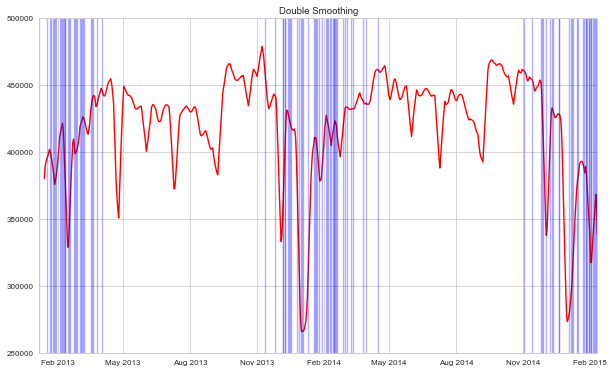

In [250]:
plt.figure(figsize=(10,6))


all_count['smooth']=pd.rolling_mean(all_count['entries'],7)
all_count['smooth2']=pd.rolling_mean(all_count['smooth'],7)

plt.title('Double Smoothing')
plt.plot(all_count.index,all_count['smooth2'],color='red',ls='-',fillstyle='none')

for val in snow_daily[snow_daily['snow']==1]['service_day']:
    #print val
    plt.axvline(x=val,alpha=0.3,color='blue')